In [94]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#tell pandas to display wide tables as pretty HTML tables
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)

#  def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
#   """
#    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
#    
#    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
#    """
#    ax = axes or plt.gca()
#    ax.spines['top'].set_visible(top)
#    ax.spines['right'].set_visible(right)
#    ax.spines['left'].set_visible(left)
#    ax.spines['bottom'].set_visible(bottom)
    
#turn off all ticks
#    ax.yaxis.set_ticks_position('none')
#    ax.xaxis.set_ticks_position('none')
    
#now re-enable visibles
#    if top:
#        ax.xaxis.tick_top()
#    if bottom:
#        ax.xaxis.tick_bottom()
#    if left:
#        ax.yaxis.tick_left()
#    if right:
#        ax.yaxis.tick_right()

In [128]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
# file_name = '/Users/Glenn/Documents/GA_Data_Science/Git_Dir/DAT_20_NYC/Data/imdb_top_10000.txt'
file_name = 'http://bit.ly/cs109_imdb'
data = pd.read_csv(file_name,delimiter='\t', names=names).dropna()
print "Number of rows: %i" % data.shape[0]
data.describe()

Number of rows: 9999


,year,score,votes
count,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946
std,14.830049,1.189965,34564.883945
min,1950.000000,1.500000,1356.000000
25%,1986.000000,5.700000,2334.500000
50%,1998.000000,6.600000,4981.000000
75%,2005.000000,7.200000,15278.500000
max,2011.000000,9.200000,619479.000000


In [129]:
data.runtime.head()

clean_runtime = [float(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946,103.580358
std,14.830049,1.189965,34564.883945,26.629310
min,1950.000000,1.500000,1356.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,102.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


In [98]:
#determine the unique genres

genres = set()
# print data['genres'].head()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]

# Strip trailing 7 characters from title to remove year info  
data['title'] = [t[0:-7] for t in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [99]:
data[['score', 'runtime', 'year', 'votes']].describe()

,score,runtime,year,votes
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,1993.471447,16605.462946
std,1.189965,26.629310,14.830049,34564.883945
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,102.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


In [163]:
#hmmm, a runtime of 0 looks suspicious. How many movies have that?
print len(data[data.runtime == 0])

#probably best to flag those bad data as NAN
data.runtime[data.runtime==0]= np.nan


282


/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


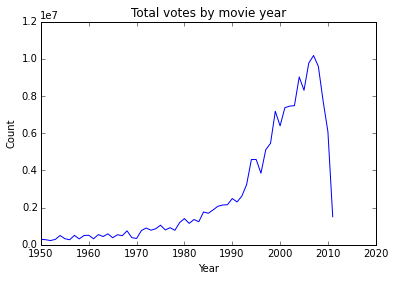

In [161]:
# CLASS 5 HOMEWORK 
# How many total votes were cast for each year? 

#Use 'groupby' to gather vote information by year and sum
yearly_votes = data.groupby('year').votes.sum()

# Now plot it (NB, not sure how to set x-axis when using an index)

plt.plot(yearly_votes.index, yearly_votes)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Total votes by movie year")

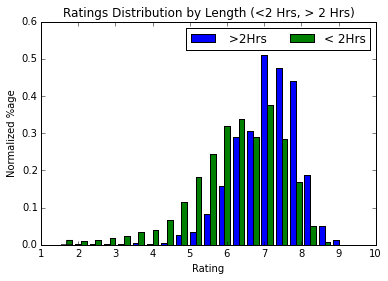

In [130]:
# CLASS 5 HOMEWORK 
# Is the distribution of ratings for movies > 2 hrs different than movies < 2hrs?
# Create a list of scores of movies according to runtime
movie_dist = (data[data.runtime>120].score,data[data.runtime<121].score)

# Now plot, normalizing distribution to allow comparison
plt.hist(movie_dist,bins=20, normed= True)
plt.legend((' >2Hrs','< 2Hrs'),ncol=5, loc=1)
plt.xlabel("Rating")
plt.ylabel("Normalized %age")
plt.title("Ratings Distribution by Length (<2 Hrs, > 2 Hrs)")

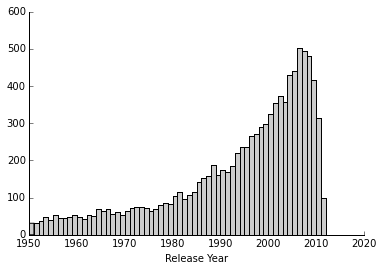

In [87]:
# more movies in recent years, but not *very* recent movies (they haven't had time to receive lots of votes yet?)
plt.hist(data.year, bins=np.arange(1950, 2013), color='#cccccc')
plt.xlabel("Release Year")
remove_border()

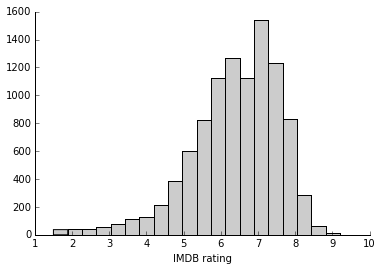

In [62]:

plt.hist(data.score, bins=20, color='#cccccc')
plt.xlabel("IMDB rating")
remove_border()

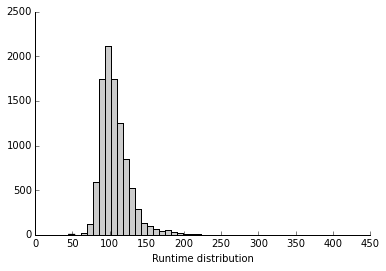

In [63]:
plt.hist(data.runtime.dropna(), bins=50, color='#cccccc')
plt.xlabel("Runtime distribution")
remove_border()

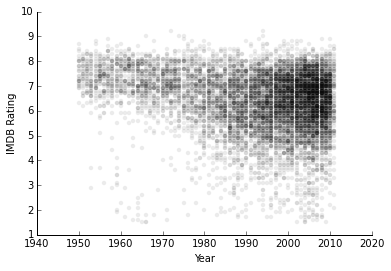

In [64]:
#hmm, more bad, recent movies. Real, or a selection bias?

plt.scatter(data.year, data.score, lw=0, alpha=.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
remove_border()

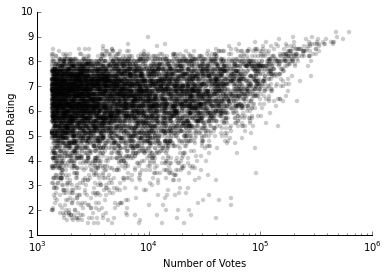

In [65]:
plt.scatter(data.votes, data.score, lw=0, alpha=.2, color='k')
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')
remove_border()

In [66]:
# low-score movies with lots of votes
data[(data.votes > 9e4) & (data.score < 5)][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
316,New Moon,2009,4.5,90457,Adventure|Drama|Fantasy|Romance
333,Batman & Robin,1997,3.5,91875,Action|Crime|Fantasy|Sci-Fi


In [67]:
# The lowest rated movies
data[data.score == data.score.min()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
1981,Manos: The Hands of Fate,1966,1.5,20927,Horror
2792,Superbabies: Baby Geniuses 2,2004,1.5,13196,Comedy|Family
3745,Daniel the Wizard,2004,1.5,8271,Comedy|Crime|Family|Fantasy|Horror
5157,Ben & Arthur,2002,1.5,4675,Drama|Romance
5992,Night Train to Mundo Fine,1966,1.5,3542,Action|Adventure|Crime|War
6256,Monster a-Go Go,1965,1.5,3255,Sci-Fi|Horror
6725,Dream Well,2009,1.5,2848,Comedy|Romance|Sport


In [68]:
# The highest rated movies
data[data.score == data.score.max()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
0,The Shawshank Redemption,1994,9.2,619479,Crime|Drama
25,The Godfather,1972,9.2,474189,Crime|Drama


In [69]:
#sum sums over rows by default
genre_count = np.sort(data[genres].sum())[::-1]
pd.DataFrame({'Genre Count': genre_count})

,Genre Count
0,5697
1,3922
2,2832
3,2441
4,1890
5,1867
6,1312
7,1215
8,1009
9,915


In [70]:
#axis=1 sums over columns instead
genre_count = data[genres].sum(axis=1) 
print "Average movie has %0.2f genres" % genre_count.mean()
genre_count.describe()

Average movie has 2.75 genres


count    9998.000000
mean        2.753851
std         1.168902
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

In [71]:
decade =  (data.year // 10) * 10

tyd = data[['title', 'year']]
tyd['decade'] = decade

tyd.head()

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,year,decade
0,The Shawshank Redemption,1994,1990
1,Pulp Fiction,1994,1990
2,Fight Club,1999,1990
3,The Matrix,1999,1990
4,Inception,2010,2010


year
1950    6.274126
1960    6.271731
1970    6.375000
1980    6.351979
1990    6.359598
2000    6.436226
2010    6.431477
Name: Decade Mean, dtype: float64


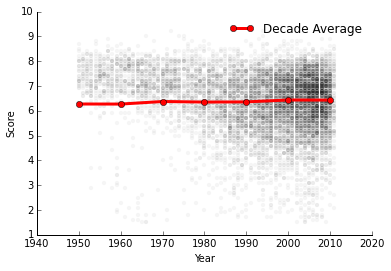

In [137]:
#mean score for all movies in each decade
decade_mean = data.groupby(decade).score.mean()
decade_mean.name = 'Decade Mean'
print decade_mean

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

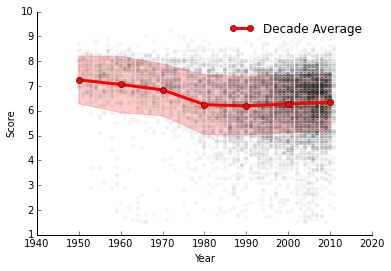

In [73]:

grouped_scores = data.groupby(decade).score

mean = grouped_scores.mean()
std = grouped_scores.std()

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.fill_between(decade_mean.index, (decade_mean + std).values,
                 (decade_mean - std).values, color='r', alpha=.2)
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

In [74]:
for year, subset in data.groupby('year'):
    print year, subset[subset.score == subset.score.max()].title.values

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 